In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
color= sns.color_palette()
sns.set_style('darkgrid')

In [3]:
df_train = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")

Id = df_test["Id"]

df_train.set_index("Id", inplace = True)
df_test.set_index("Id", inplace = True)

In [4]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 79)


In [7]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text xticklabel objects>)

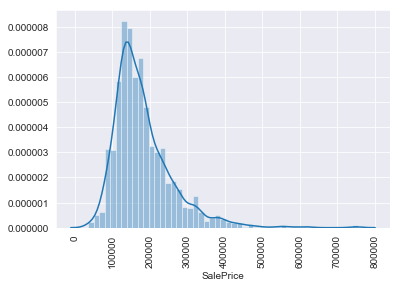

In [9]:
# plt.hist(df_train["SalePrice"], normed=True)

sns.distplot(df_train['SalePrice'])
plt.xticks(rotation=90)

In [10]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [11]:
# null_values = df_train.isnull().sum().loc[lambda x: x > 0]
# null_count = len(df_train)
# null_percent = null_values / null_count
# pd.DataFrame({"null_count":null_values, "null_percent":null_percent}).\
#     sort_values(['null_count'], ascending=False)

In [12]:
# missing_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
#                   'FireplaceQu', 'LotFrontage']
# df_train.drop(missing_columns, inplace=True, axis=1)
# df_test.drop(missing_columns, inplace=True, axis=1)

In [13]:
# null_values = df_train.isnull().sum().loc[lambda x: x > 0]
# null_count = len(df_train)
# null_percent = null_values / null_count
# pd.DataFrame({"null_count":null_values, "null_percent":null_percent}).\
#     sort_values(['null_count'], ascending=False)


 mu = 180921.20 and sigma = 79415.29



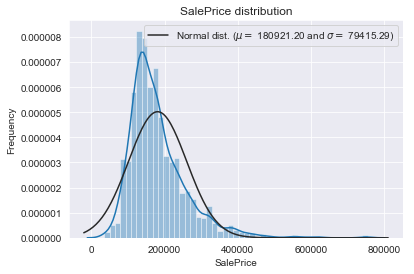

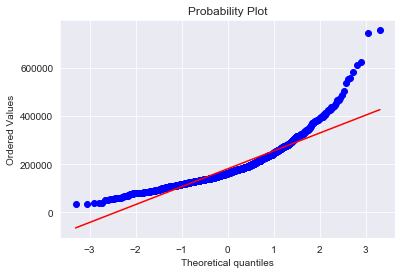

In [14]:
sns.distplot(df_train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()


 mu = 12.02 and sigma = 0.40



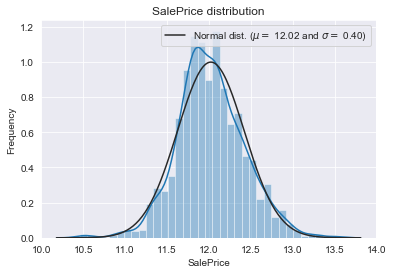

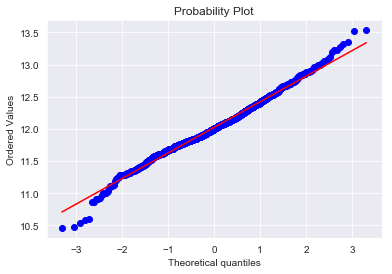

In [15]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

sns.distplot(df_train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()

In [16]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [17]:
feature_categories = {
    'MSSubClass': 'c',
    'MSZoning': 'c',
    'LotArea': 'n',
    'Street': 'c',
    'LotShape': 'c',
    'LandContour': 'c',
    'Utilities': 'c',
    'LotConfig': 'c',
    'LandSlope': 'c',
    'Neighborhood': 'c',
    'Condition1': 'c',
    'Condition2': 'c',
    'BldgType': 'c',
    'HouseStyle': 'c',
    'OverallQual': 'c',
    'OverallCond': 'c',
    'YearBuilt': 'n',
    'YearRemodAdd': 'n',
    'RoofStyle': 'c',
    'RoofMatl': 'c',
    'Exterior1st': 'c',
    'Exterior2nd': 'c',
    'MasVnrType': 'c',
    'MasVnrArea': 'n',
    'ExterQual': 'c',
    'ExterCond': 'c',
    'Foundation': 'c',
    'BsmtQual': 'c',
    'BsmtCond': 'c',
    'BsmtExposure': 'c',
    'BsmtFinType1': 'c',
    'BsmtFinSF1': 'n',
    'BsmtFinType2': 'c',
    'BsmtFinSF2': 'n',
    'BsmtUnfSF': 'n',
    'TotalBsmtSF': 'n',
    'Heating': 'c',
    'HeatingQC': 'c',
    'CentralAir': 'c',
    'Electrical': 'c',
    '1stFlrSF': 'n',
    '2ndFlrSF': 'n',
    'LowQualFinSF': 'n',
    'GrLivArea': 'n',
    'BsmtFullBath': 'n',
    'BsmtHalfBath': 'n',
    'FullBath': 'n',
    'HalfBath': 'n',
    'KitchenAbvGr': 'n',
    'KitchenQual': 'c',
    'TotRmsAbvGrd': 'n',
    'Functional': 'c',
    'Fireplaces': 'n',
    'GarageType': 'c',
    'GarageYrBlt': 'n',
    'GarageFinish': 'c',
    'GarageCars': 'n',
    'GarageArea': 'n',
    'GarageQual': 'c',
    'GarageCond': 'c',
    'PavedDrive': 'c',
    'WoodDeckSF': 'n',
    'OpenPorchSF': 'n',
    'EnclosedPorch': 'n',
    '3SsnPorch': 'n',
    'ScreenPorch': 'n',
    'PoolArea': 'n',
    'MiscVal': 'n',
    'MoSold': 'c',
    'YrSold': 'n',
    'SaleType': 'c',
    'SaleCondition': 'c'
}

In [18]:
#Transforming some numerical variables that are really categorical

df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_test['MSSubClass'] = df_test['MSSubClass'].astype(str)

df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_test['OverallCond'] = df_test['OverallCond'].astype(str)

df_train['OverallQual'] = df_train['OverallQual'].astype(str)
df_test['OverallCond'] = df_test['OverallCond'].astype(str)

df_train['MoSold'] = df_train['MoSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)


In [19]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [20]:
#Concatenate train and test data

ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train['SalePrice'].values
all_data = pd.concat((df_train, df_test))
all_data.drop(['SalePrice'], axis=1, inplace = True)

In [21]:
all_data.head(7)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
6,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
7,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007


In [22]:
null_values = all_data.isnull().sum().loc[lambda x: x > 0]
null_count = len(all_data)
null_percent = null_values / null_count
null_df = pd.DataFrame({"null_count":null_values, "null_percent":null_percent}).\
    sort_values(['null_count'], ascending=False)
null_df

,null_count,null_percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [23]:
null_df.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'Utilities', 'Functional',
       'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 'Exterior2nd',
       'Exterior1st', 'KitchenQual', 'Electrical', 'BsmtUnfSF', 'BsmtFinSF2',
       'BsmtFinSF1', 'SaleType', 'TotalBsmtSF', 'GarageArea'],
      dtype='object')

In [24]:
# data descriptions for 'PoolQC', 'MiscFeature', 'Alley', 'Fence',
# 'FireplaceQu' state NA means feature does not exist

all_data['PoolQC'] = all_data['PoolQC'].fillna("None")
all_data['MiscFeature'] = all_data['MiscFeature'].fillna("None")
all_data['Alley'] = all_data['Alley'].fillna("None")
all_data['Fence'] = all_data['Fence'].fillna("None")
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna("None")

In [25]:
#LotFrontage covered by LotArea
all_data.drop(['LotFrontage'], axis=1, inplace = True)

In [26]:
#Garage Categorical vars, replace null with "None"

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [27]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)

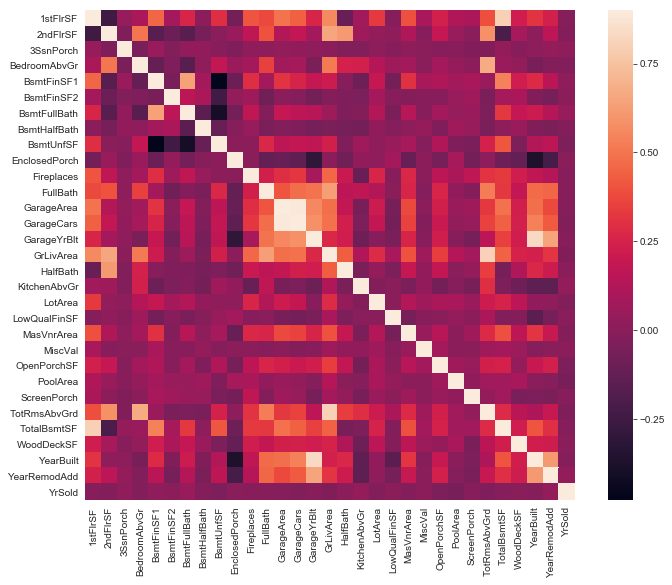

In [28]:
#Correlation map to see how features are correlated with Sale Price

corrmat = all_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [29]:
all_data.drop(['GarageYrBlt'], axis = 1, inplace=True)
all_data.drop(['GarageCars'], axis = 1, inplace=True)

In [37]:
#Bsmt missing values replaced with 0, 'no basement'
basement_num = [
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath'
]

In [38]:
for base in basement_num:
    all_data[base] = all_data[base].fillna(0)

In [39]:
#Bsmt categorical missing values replace with None

basement_cat = [
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2'
]

In [40]:
for base in basement_cat:
    all_data[base] = all_data[base].fillna('None')

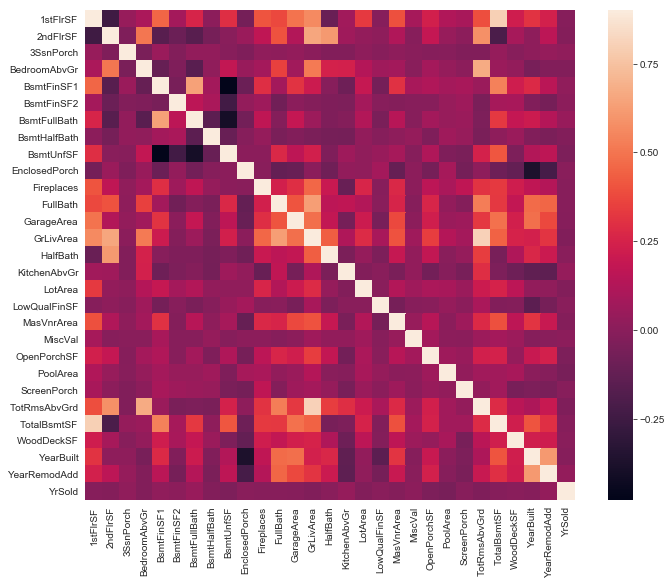

In [41]:
#Correlation map to see how features are correlated with Sale Price

corrmat = all_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
df_train.columns

In [ ]:
year_features = [
    'YearBuilt',
    'YearRemodAdd',
    'GarageYrBlt',
    'YrSold'
]

In [ ]:
all_data[year_features].describe()

In [ ]:
df_test['GarageYrBlt'][df_test['GarageYrBlt'] > 2010]

In [ ]:
df_test.loc[df_test.index == 2593, year_features]

In [ ]:
all_data['GarageYrBlt'][all_data.index==2593] = 2007

In [ ]:
all_data.loc[all_data.index == 2593, year_features]

In [ ]:
year_min = 1872
year_max = 2010

all_data['YearBuilt'] = 2010 - all_data['YearBuilt']
all_data['YearRemodAdd'] = 2010 - all_data['YearRemodAdd']
all_data['GarageYrBlt'] = 2010 - all_data['GarageYrBlt']
all_data['YrSold'] = 2010 - all_data['YrSold']

In [ ]:
all_data[year_features].describe()

In [ ]:
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
def categorical_comp(df, var):
    data = pd.concat([df['SalePrice'], df[var]], axis = 1).sort_values(var, ascending=False)

    f, ax = plt.subplots(figsize=(8,6))
    fig = sns.boxplot(x=var, y='SalePrice', data = data)
    plt.xticks(rotation=90)

In [ ]:
#Label Encoding some categorical variables that may contain information in their ordering set

cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
       'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual',
       'BsmtFinType1', 'BsmtFinType2', 'Functional', 'BsmtExposure', 
       'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street',
       'CentralAir', 'MSSubClass', 'OverallCond')

# missing_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
#                   'FireplaceQu', 'LotFrontage']

In [ ]:
# months_replace = {
#     1: 'jan',
#     2: 'feb',
#     3: 'mar',
#     4: 'apr',
#     5: 'may',
#     6: 'jun',
#     7: 'jul',
#     8: 'aug',
#     9: 'sep',
#     10: 'oct',
#     11: 'nov',
#     12: 'dec'
# }

In [ ]:
# df_train['MoSold'].replace(months_replace, inplace=True)
# df_test['MoSold'].replace(months_replace, inplace=True)

In [ ]:
# overall_qual_replace= {
#     10: "a",
#     9: 'b',
#     8: 'c',
#     7: 'd',
#     6: 'e',
#     5: 'f',
#     4: 'g',
#     3: 'h',
#     2: 'i',
#     1: "j"
# }

# overall_cond_replace= {
#     10: "a",
#     9: 'b',
#     8: 'c',
#     7: 'd',
#     6: 'e',
#     5: 'f',
#     4: 'g',
#     3: 'h',
#     2: 'i',
#     1: "j"
# }

In [ ]:
# print(df_train['MoSold'].unique())
# print(df_train['MoSold'].value_counts())

In [ ]:
# categorical_comp(df_train, 'MoSold')

In [ ]:
# df_train['OverallQual'].replace(overall_qual_replace, inplace=True)
# df_test['OverallQual'].replace(overall_qual_replace, inplace=True)

# df_train['OverallCond'].replace(overall_cond_replace, inplace=True)
# df_test['OverallCond'].replace(overall_cond_replace, inplace=True)

In [ ]:
# print(df_train['OverallQual'].unique())
# print(df_train['OverallQual'].value_counts())

# print(df_train['OverallCond'].unique())
# print(df_train['OverallCond'].value_counts())

In [ ]:
# categorical_comp(df_train, 'OverallQual')
# categorical_comp(df_train, 'OverallCond')

In [ ]:
# var = "MSSubClass"
# data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
# data.plot.scatter(x=var, y='SalePrice')

# f, ax = plt.subplots(figsize=(8,6))
# fig = sns.boxplot(x=var, y='SalePrice', data = data)

In [ ]:
# ms_sub_class_replace = {
#     20: 'a',
#     30: 'b',
#     40: 'c',
#     45: 'd',
#     50: 'e',
#     60: 'f',
#     70: 'g',
#     75: 'h',
#     80: 'i',
#     85: 'j',
#     90: 'k',
#     120: 'l',
#     150: 'm',
#     160: 'n',
#     180: 'o',
#     190: 'p'
# }

In [ ]:
# df_train['MSSubClass'].replace(ms_sub_class_replace, inplace=True)
# df_test['MSSubClass'].replace(ms_sub_class_replace, inplace=True)

In [ ]:
# print(df_train['MSSubClass'].unique())
# print(df_train['MSSubClass'].value_counts())

In [ ]:
# categorical_comp(df_train, "MSSubClass")

In [ ]:
categorical_features = dict(filter(lambda x: x[1]=='c', feature_categories.items()))

In [ ]:
categorical_features

In [ ]:
for key in categorical_features:
    categorical_comp(df_train, key)

In [ ]:
df_train.columns

In [ ]:
year_features = [
    'YearBuilt',
    'YearRemodAdd',
    'GarageYrBlt',
    'YrSold'
]

In [ ]:
df_train[year_features].describe()

In [ ]:
year_min = 1900
year_max = 2010

df_train['YearBuilt'] = 2010 - df_train['YearBuilt']
df_train['YearRemodAdd'] = 2010 - df_train['YearRemodAdd']
df_train['GarageYrBlt'] = 2010 - df_train['GarageYrBlt']
df_train['YrSold'] = 2010 - df_train['YrSold']

df_test['YearBuilt'] = 2010 - df_test['YearBuilt']
df_test['YearRemodAdd'] = 2010 - df_test['YearRemodAdd']
df_test['GarageYrBlt'] = 2010 - df_test['GarageYrBlt']
df_test['YrSold'] = 2010 - df_test['YrSold']

In [ ]:
df_train[year_features].describe()

In [ ]:
def numerical_comp(df, var):
    data = pd.concat([df['SalePrice'], df[var]], axis = 1)

#     f, ax = plt.subplots(figsize=(8,6))
    data.plot.scatter(x=var, y='SalePrice')
    plt.xticks(rotation=90)

In [ ]:
numerical_filtered = dict(filter(lambda x: x[1]=='n', feature_categories.items()))

In [ ]:
numerical_filtered

In [ ]:
numerical_features = [key for key in numerical_filtered]
numerical_features

In [ ]:
df_train[numerical_features].head()

In [ ]:
for feature in numerical_filtered:
    numerical_comp(df_train, feature)

In [ ]:
outlier_features = [
    'BsmtFinSF1',
    'TotalBsmtSF',
    '1stFlrSF',
    'GrLivArea',
    'GarageArea',
    'OpenPorchSF'
]

In [ ]:
for feature in outlier_features:
    corr = df_train['SalePrice'].corr(df_train[feature])
    print(f'Corr SalesPrice and {feature}: {corr}')

In [ ]:
df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) &
                                 (df_train['SalePrice'] < 12.5)].index)

In [ ]:
for feature in outlier_features:
    numerical_comp(df_train, feature)

In [ ]:
# df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

sns.distplot(df_train['GarageArea'][df_train['GarageArea'] > 0], fit=norm)

(mu, sigma) = norm.fit(df_train['GarageArea'][df_train['GarageArea'] > 0])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Frequency')
plt.title('GarageArea distribution')

fig = plt.figure()
res = stats.probplot(df_train['GarageArea'][df_train['GarageArea'] > 0], plot = plt)
plt.show()